   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6

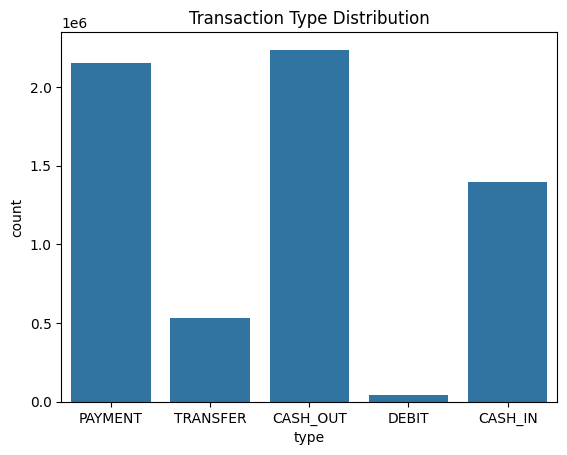

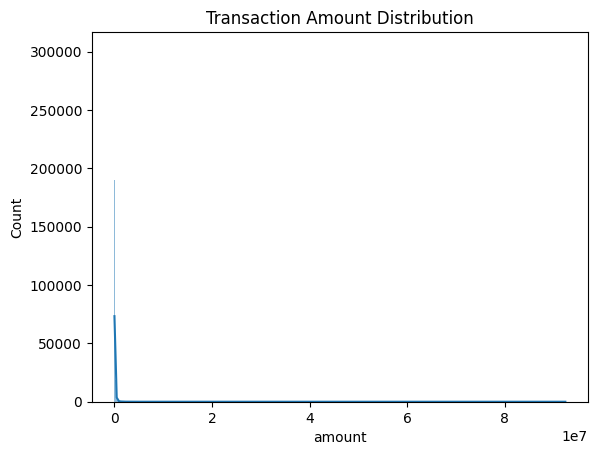

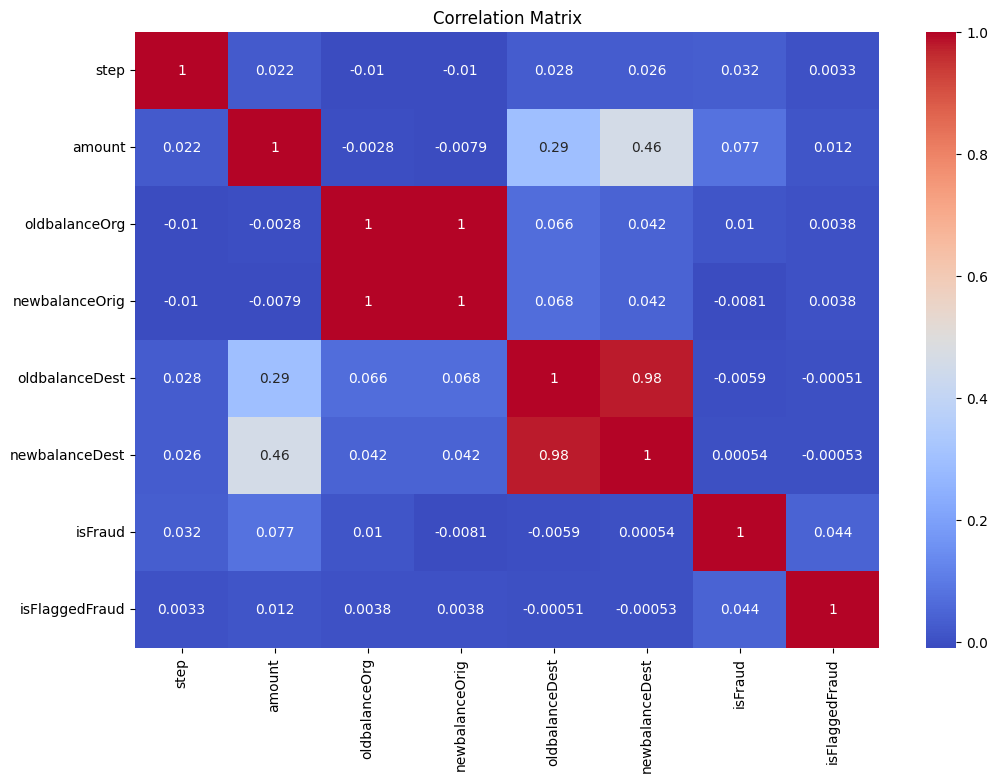

In [3]:
# DATA VISUALISATION

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\archive\Fraud.csv")

# Display the first few rows of the dataset
print(df.head())

# Basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Distribution of fraud and non-fraud cases
print(df['isFraud'].value_counts())

# Plot distribution of transaction types
sns.countplot(x='type', data=df)
plt.title('Transaction Type Distribution')
plt.show()

# Plot distribution of amounts
sns.histplot(df['amount'], kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# Correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [1]:
# TRAINING THE MODEL

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\archive\Fraud.csv")

# Preprocessing
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

# Convert categorical columns to dummy variables
X = pd.get_dummies(X, columns=['type'], drop_first=True)

# Define the correct order of features
feature_order = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
                 'isFlaggedFraud', 'type_TRANSFER', 'type_CASH_OUT', 'type_PAYMENT', 'type_DEBIT']

# Ensure all columns are present and in the correct order
for feature in feature_order:
    if feature not in X.columns:
        X[feature] = 0
X = X[feature_order]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save the model, scaler, and feature order
joblib.dump(model, 'fraud_detection_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(feature_order, 'feature_order.pkl')

[[1270875      29]
 [    326    1294]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.80      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



['feature_order.pkl']